**1. Import các thư viện cần thiết**

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error as msle

**2. Đọc file dữ liệu và chia dataset theo tỉ lệ 9:1**

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('D:\STB.csv')

df = df[['Price','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df1 = df
# Split the data into training, testing, and validation
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


**Xem** **lại** **dataset**

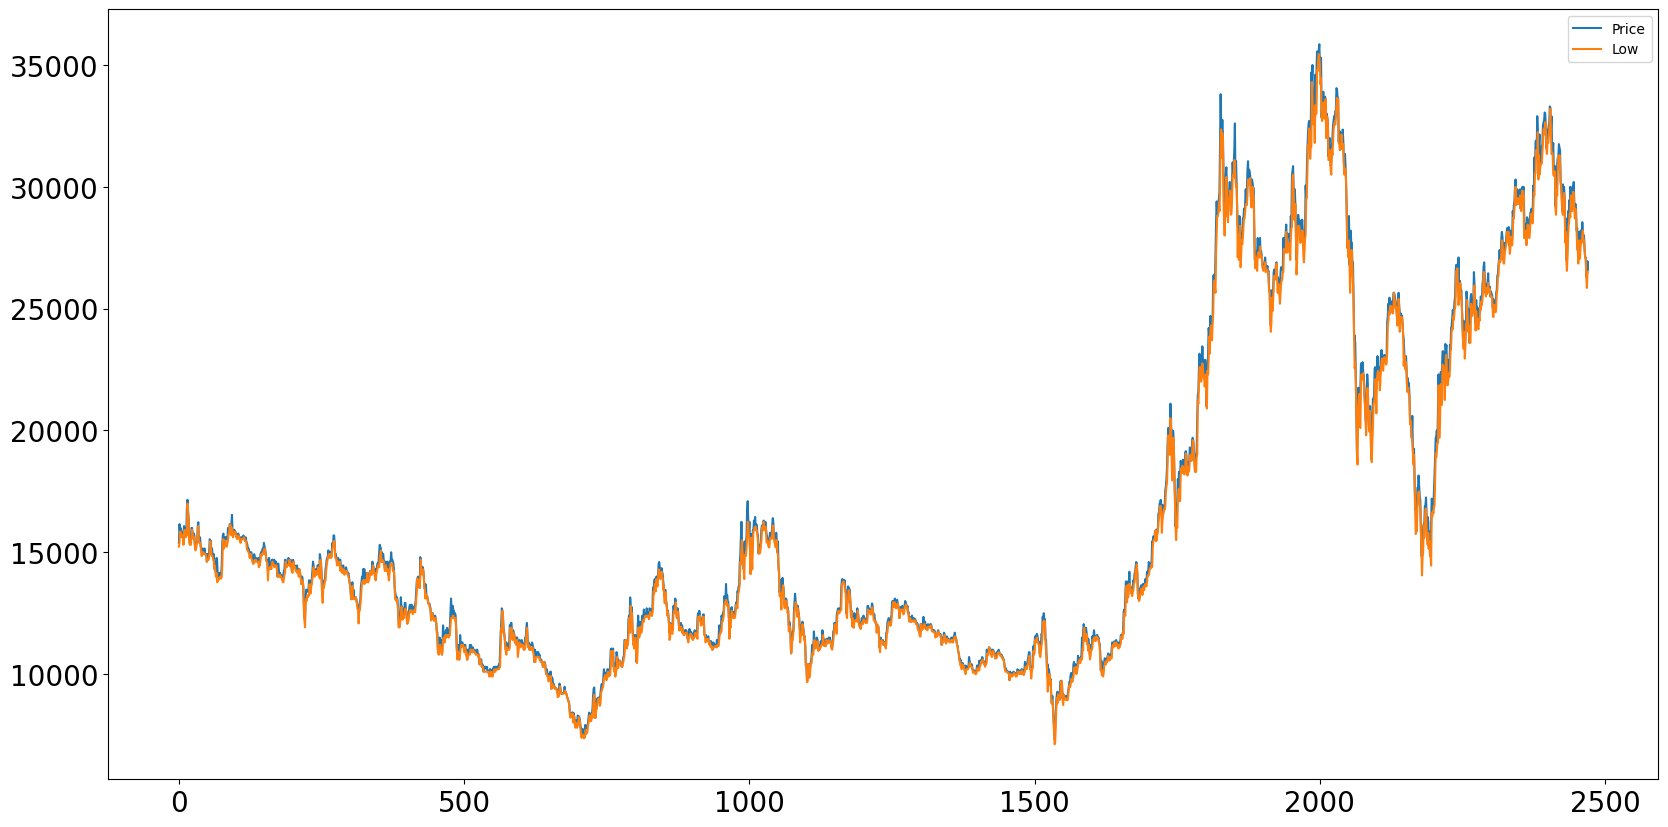

In [3]:
df.plot(figsize=(20, 10), fontsize=20)
plt.show()

***Tìm m thích hợp***

In [4]:
# Dùng adf để kiểm tra xem dataset có stationary hay chưa
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price'])

(-1.5299166309944383,
 0.518663537961039,
 27,
 2443,
 {'1%': -3.4330295678957983,
  '5%': -2.8627238067228236,
  '10%': -2.5674001882176833},
 36622.82516437444)

In [5]:
# Vì dataset chưa stationary nên ta thực hiện diff()
df_diff = df1['Price'].diff().dropna()

In [6]:
# Tiếp tục dùng adf để kiểm tra xem p value có < 0.05 ko
adfuller(df_diff)

(-8.164252642536608,
 8.971648539457473e-13,
 26,
 2443,
 {'1%': -3.4330295678957983,
  '5%': -2.8627238067228236,
  '10%': -2.5674001882176833},
 36608.47738287806)

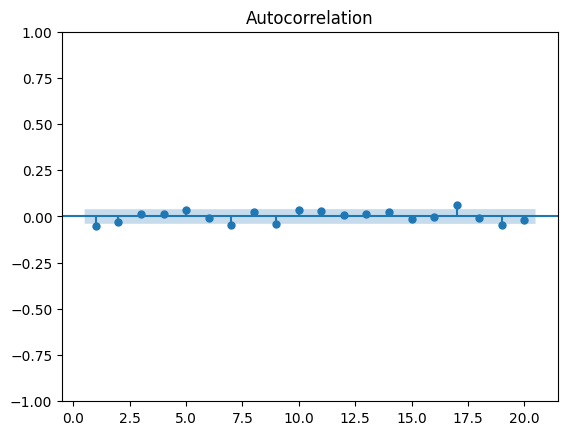

In [7]:
# Sau khi dataset đã stationary vẽ acf để tìm m
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff, lags = 20 , zero = False)
plt.show()

**3. Dùng auto_arima để tìm model thích hợp**

In [8]:
df

,Price,Low
0,15385,15231.0
1,16154,15385.0
2,15846,15846.0
3,16000,15846.0
4,15769,15769.0
...,...,...
2466,27100,27050.0
2467,26300,26300.0
2468,26600,25850.0
2469,26950,26450.0


In [9]:
# Tạo y_train, x_train
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Dùng auto_arima để tìm thông số thích hợp
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = True, m =5)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=33092.952, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=33093.088, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=33094.624, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=33094.734, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=33091.260, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=33092.714, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=33092.832, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=33093.616, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=33095.025, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=33095.015, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=33096.130, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 2.643 seconds


**Dùng SARIMAX để train model**

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(y_train, exog = np.array(train_data['Price']), order=(0,1,0), seasonal_order=(0,0,0,5))
model_fit = model1.fit()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**4. Quá trình test**

In [11]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
exg = np.array(test_data['Low'])
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_test)+len(y_train)-1, exog=exg)
y_pred_test

array([21900., 21850., 22050., 22350., 22200., 22500., 23300., 23400.,
       24100., 24200., 24150., 24700., 24550., 24950., 25000., 25500.,
       26550., 26500., 26650., 25850., 25150., 25400., 25400., 26050.,
       25600., 25550., 25000., 24200., 23650., 23350., 24050., 22950.,
       23450., 24350., 24200., 25350., 24700., 24050., 24300., 23600.,
       23600., 23600., 25200., 25000., 24700., 24850., 24850., 25450.,
       25950., 25000., 24100., 24900., 24500., 24550., 24200., 24150.,
       24600., 24500., 25050., 24950., 25300., 25150., 25400., 25850.,
       26500., 26500., 25900., 25650., 25500., 25850., 25600., 25800.,
       26050., 25700., 25650., 25800., 25500., 25500., 25500., 25450.,
       24900., 24650., 25150., 25150., 24950., 24850., 25000., 25600.,
       25750., 26300., 26350., 26900., 27000., 26900., 27000., 27200.,
       27800., 27700., 27300., 26850., 26850., 27300., 27400., 27550.,
       27650., 28150., 28050., 27750., 28150., 27600., 27250., 27500.,
      

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [12]:
# Dùng thuật toán LR để tìm giá trị Low cho 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['Low'])

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá trị low 30 ngày tiếp theo
low_next_30_days = ln_model.predict(x_next_30_days)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(start=len(x_train), end = len(x_train)+ len(x_next_30_days)-1, exog=low_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21868.40734901 21873.45465708 21878.50196515 21883.54927321
 21888.59658128 21893.64388935 21898.69119742 21903.73850549
 21908.78581356 21913.83312162 21918.88042969 21923.92773776
 21928.97504583 21934.0223539  21939.06966197 21944.11697003
 21949.1642781  21954.21158617 21959.25889424 21964.30620231
 21969.35351038 21974.40081844 21979.44812651 21984.49543458
 21989.54274265 21994.59005072 21999.63735879 22004.68466685
 22009.73197492 22014.77928299]


***7.Đánh giá độ chính xác thuật toán***

In [13]:
#MSLE
test_msle = msle(y_test, y_pred_test)
print('Testing MSLE:', test_msle)

#RMSE
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)

Testing MSLE: 0.00037513603876887297
Testing RMSE: 538.431896234416
Testing MAPE: 1.3219486670710894
Testing MAE: 372.2672064777309


**8. Vẽ biểu đồ**

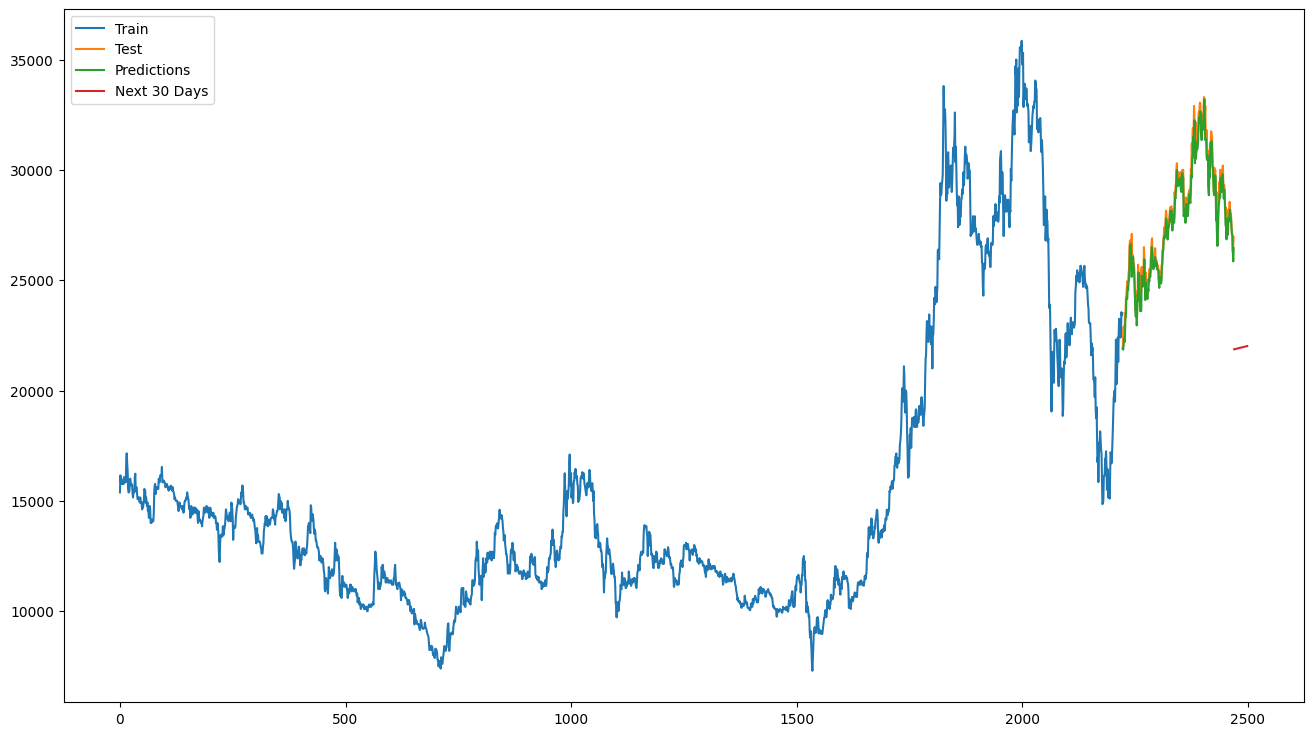

In [14]:
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()